[0]
X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
red
green
blue
Normal_change_rate__0_01_
Normal_change_rate__0_1_
Roughness__0_1_
Roughness__0_005786_
DefectDepth
ArcDist
Int
LocalZ
Offset
Chainage
Coord__X
Coord__Y
Coord__Z
number of points = 2061134
52644996 84845996 1.6116630724029308
number of pixels = 8247252
width in pixels = 3646
height in pixels = 2262
mean pixel value = 571467.8801381681
cropping masks
cropping masks
UnetPlusPlus
resnet18
cuda
epoch: 0 training loss:  2.451   test loss:  2.548 
epoch: 1 training loss:  2.411   test loss:  1.939 
epoch: 2 training loss:  2.210   test loss:  1.843 
epoch: 3 training loss:  2.015   test loss:  2.241 
epoch: 4 training loss:  1.850   test loss:  1.965 
epoch: 5 training loss:  1.877   test loss:  2.023 
epoch: 6 training loss:  1.712   test loss:  2.034 
epoch: 7 training loss:  1.916   test loss:  2.01

ValueError: Requested crop size (555, 555) is larger than the image size (256, 256)

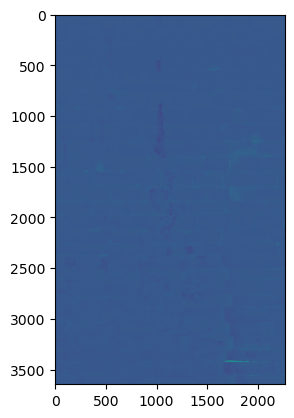

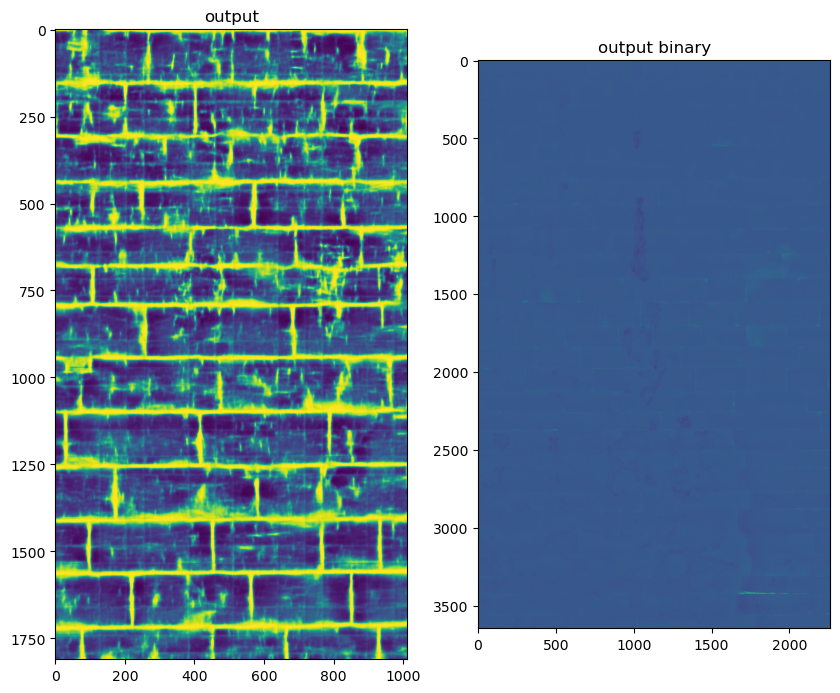

In [1]:
#test synthetic damagelevel vs real
import numpy as np
from tabulate import tabulate
from UNET import unet
from custommodel1 import custommodel1
from raster import raster
import os
import shutil
import albumentations as A
from syntheticdamage import syntheticspall, syntheticflor
import cv2 as cv
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from syntheticwall import syntheticwall
import random
from addnoise import addperlin1, addperlin2, addperlin3
import os

os.chdir("../data")

#path1 = 'C:/Users/eejmws/OneDrive - University of Leeds/Incoming data/'
#path2 = 'C:/Users/jackm/OneDrive - University of Leeds/Incoming data/'
 
#isdir1 = os.path.isdir(path1) 
#isdir2 = os.path.isdir(path2) 

#if isdir1 == True:
#    os.chdir(path1)
#elif isdir2 == True:
#    os.chdir(path2)
#else:
#    print("directory not found")






saveloc = ['18testsynth0/''18testsynth1/','18testsynth2/','18testsynth3/','18testsynth4/']#,'testideal4/','testideal5/']
testmaskfile = "testmask.tiff"
testfile = "test.tiff"
#cloud ="synthetic_defect_wall.tiff"
#maskfile = "mask.png"
cloud ="traincloud.las"
maskfile = "mask.png"
#reslist = [0.7, 1, 1.5, 2, 3, 4]
damagelist = [0.7]#, 0.55, 0.7, 0.75, 0.8]

damagelevel = damagelist[0]

testim = Image.open("test.tiff")
wallim = Image.open("wall.tiff")



res1 = 2
dimlist = [1024]
dim1 = dimlist[0]
synthproplist = [0,0.1,0.2, 0.5,1]
table = [['Network', 'encoder', 'epochs', 'IOU', 'Precision', 'recall','dim']]
#for dim1, saveloc in zip(dimlist,saveloc):
variationmagnitude = 0.3
x = 100

try:
    os.makedirs("synth/")
except OSError:
    pass 



for n in range(0,x):

    t = 1
#     while t == 1:

#         try:
#             blocklength = random.randint(50,350)
#             blockheight = int(max(0.5,random.random())*blocklength/1.3)
#             #create wall
#             synthwall,synthmask = syntheticwall(int(wallim.size[0]/2),int(wallim.size[1]/2),blockheight,blocklength,"syntheticwalltest"+str(n)+".tiff")
#             jointmask = synthmask
#             #add spalling
#             synthspalledwall3, spallmask = syntheticspall(synthwall,synthmask,damagelevel)
#             #add efflorescence
#             synthspalledwall2, flormask = syntheticflor(synthspalledwall3,synthmask,damagelevel)
#             #surface variation
#             synthspalledwall1, noiseadded = addperlin1(synthspalledwall2,variationmagnitude)
#             #wall deformation
#             synthspalledwall, deformationadded = addperlin2(synthspalledwall1,variationmagnitude)

#             spalledwallim = Image.fromarray(synthspalledwall) 
#             spalledwallim.save("synth/"+"synthetic_defect_wall"+str(n)+".tiff")
#             jointmaskim = Image.fromarray(jointmask*255) 
#             jointmaskim.save("synth/"+"synthetic_defect_jointmask"+str(n)+".png")
#             spallmaskim = Image.fromarray(spallmask*255) 
#             spallmaskim.save("synth/"+"synthetic_defect_spallmask"+str(n)+".png")
#             flormaskim = Image.fromarray(flormask*255) 
#             flormaskim.save("synth/"+"synthetic_defect_efflorecencemask"+str(n)+".png")
#             noiseaddedim = Image.fromarray(noiseadded*255) 
#             noiseaddedim.save("synth/"+"synthetic_defect_noiseadded"+str(n)+".tiff")
#             deformationaddedim = Image.fromarray(deformationadded*255) 
#             deformationaddedim.save("synth/"+"synthetic_defect_deformationadded"+str(n)+".tiff")
#             t = 0
#         except:
#             continue




    



for synthprop, saveloc in zip(synthproplist,saveloc):
    
   #  testim = Image.open("test.tiff")
   #  wallim = Image.open("wall.tiff")
   #  #maskim = Image.open("wall.tiff")
   #  wall = np.array(wallim)
   #  #mask = np.array(maskim)
   #  mask = wall>0.9
   #  test = np.array(testim)
   # #damagelevel = 0.7
   #  spalledwall,spallingmask = syntheticspall(wall,mask,damagelevel)
   #  spalledwallim = Image.fromarray(spalledwall) 
   #  spalledwallim.save("synthetic_defect_wall.tiff")
    
    try:
        os.makedirs(saveloc)
        os.makedirs(saveloc+"results/")
        
        os.makedirs("synth/"+saveloc)
        os.makedirs("synth/"+saveloc+"results/")
        
    except OSError:
        pass  
    
    
    shutil.copyfile(testfile, saveloc+testfile)
    shutil.copyfile(testmaskfile, saveloc+testmaskfile)
    shutil.copyfile(cloud, saveloc+cloud)
    shutil.copyfile(maskfile, saveloc+maskfile)
    raster(cloud,saveloc,mask = 0,res=res1,dim=dim1) 
    raster(maskfile,saveloc,mask = 1,res=res1, dim = dim1)
    
    

    
    nosamples = len(os.listdir(saveloc+"croppedimages/"))
    nosynthtoadd = int(nosamples*synthprop)
    count = 0
    nosynthadded = 1
    while nosynthadded <=nosynthtoadd:
        print(count)
        
        synthtoadd = "synthetic_defect_wall"+str(count)+".tiff"
        masktoadd = "synthetic_defect_jointmask"+str(count)+".png"
        # for filename in os.listdir("synth"saveloc):
        # filepath = os.path.join(dirpath, filename)
        # try:
        #     shutil.rmtree(filepath)
        # except OSError:
        #     os.remove(filepath)

        try:
            os.makedirs("synth/"+saveloc+str(count)+"/")
        except OSError:
            pass
        
        raster("synth/"+synthtoadd,"synth/"+saveloc+str(count)+"/",mask = 0,res=res1,dim=dim1)
        raster("synth/"+masktoadd,"synth/"+saveloc+str(count)+"/",mask = 1,res=res1, dim = dim1)
        
        nosynthsamples = len(os.listdir("synth/"+saveloc+str(count)+"/"+"croppedimages/"))
        
        for a in range(1, nosynthsamples+1):
            shutil.copyfile("synth/"+saveloc+str(count)+"/"+"croppedimages/"+str(a)+".tiff", saveloc+"croppedimages/"+str(nosamples+nosynthadded)+".tiff")
            shutil.copyfile("synth/"+saveloc+str(count)+"/"+"croppedmasks/"+str(a)+".tiff", saveloc+"croppedmasks/"+str(nosamples+nosynthadded)+".tiff")

            nosynthadded =nosynthadded + 1
            
        count = count+1
        
        
        
        
        
    
    
    encoderstotest = ['resnet18']
    networkstotest = ['UnetPlusPlus']#,'UnetPlusPlus','DeepLabV3']
    test = 1
    n = 0
    
    
    transparams = [
        A.GridDistortion (num_steps=5, p=0.5),
        A.RandomSizedCrop([64,1024], 256, 256, w2h_ratio = 1, p=1.0),
       # A.RandomSizedCrop(min_max_height=(64, 512), height=512, width=512, w2h_ratio=1.0, interpolation=1, always_apply=False, p=0.75),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.7),
        A.GaussNoise(p=0.8, var_limit=[0.0002,0.0008]),
        A.ElasticTransform(p=0.6, alpha=500, sigma=40, alpha_affine=8),
    
    ]
    transparamsv = [
        A.RandomCrop (256, 256, always_apply=True, p=1.0),
       # A.RandomSizedCrop(min_max_height=(64, 512), height=512, width=512, w2h_ratio=1.0, interpolation=1, always_apply=False, p=0.75),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
       # A.RandomBrightnessContrast(p=0.7),
       # A.GaussNoise(always_apply=False, p=0.3, var_limit=(5, 5)),
      #  A.RandomContrast(always_apply=False, p=0.3, limit=(-0.6, 0.6)),
       # A.RandomRotate90(always_apply=False, p=0.75)
       # A.CLAHE(p=1),

    ]
    
    for network in networkstotest:
        for encoder in encoderstotest:
            pretrain = "imagenet"
            
            dim1 = 256
            if dim1 >= 512:
                 batch = 2
            else:
                 batch = 4
            path =saveloc
            inno=1
            nepochs = 300
            print(network)
            print(encoder)
            #try:
            #iou_score,precision,recall,epochsf = unet(test, inno, batch, path, nepochs, network, encoder, pretrain, dim1, transparams, transparamsv)
            iou_score,precision,recall,epochsf = unet(test, inno, batch, path, nepochs, network, encoder, pretrain, dim1, transparams, transparamsv)

            print(iou_score)
            table.append([network, encoder, epochsf, iou_score, precision, recall, dim1])
            #except:
            print('training failed')#
            
print(tabulate(table))

In [ ]:
saredgaswergsearg

In [ ]:

# INPUTS
#inno = number of input channels
#savestate = trained model to load in. format : 'test+"/results/"+savestate'
#type1 = type of data used eg. depth, normal, RGB
#network = type of network eg. Unet
#test = path to data folder
#encoder = name of encoder eg. mobilenet_v2
#dim = dimension of image crops used in network. Images will be square. eg. dim = 512 will mean 512x512 patches. (note this code will autocrop input images into patches of the correct size)
# testimage = name of testimage. Note, should be in root of data folder defined by 'test'
# testmask = name of mask for testimage. Note, should be in root of data folder defined by 'test'

# INPUT FILES
# pytorch model at location: test+"/results/"+savestate
# test image at location: test+testimage

#OUTPUTS
# iou_score = Intersection over union score for test image
# precision = precisions score for test image
# recall = recall score for test image

# OUTPUT FILES
# output of network on testimage after sigmoid function at location: test+'/results/picout{}{}{}{}.tiff'.format(type1,network,encoder,savetag)


def UNETrun(inno, savestate, type1, network, test, encoder, dim, testimage, testmask, savetag):

    import numpy as np
    import torch
    import torchvision
    from torch import nn, optim
    from torchvision import datasets
    import matplotlib.pyplot as plt
    import math
    from PIL import Image, ImageOps    
    from torch.utils import data
    import albumentations as A
    import torchvision.utils as vutils
    from torch.utils.data import Dataset as BaseDataset
    import torchvision.transforms as transforms
    from sklearn.model_selection import train_test_split
    import pathlib
    from torch.autograd import Variable
    import torch.nn.functional as F
    from albumentations.pytorch import ToTensorV2    
    import segmentation_models_pytorch as smp

    Net = getattr(smp, network)(
        encoder_name= encoder,        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
 #   encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
        in_channels=inno,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
        classes=1,                      # model output channels (number of classes in your dataset)
        ) 

    d = torch.load(test+"/results/"+savestate)
    Net.load_state_dict(d["state_dict"])

   # Net.eval()
    Net.cuda()
    from PIL import Image
   # if inno == 1:
   #     pic = Image.open(test).convert('L')
   # if inno == 3:
   #     pic = Image.open(test).convert('RGB')
    
    pic = Image.open(test+testimage)

    pic1 = pic.copy()
    pic2 = pic.copy()
    pic3 = pic.copy()
    pic4 = pic.copy()
   # dim = 512
    w = pic.size[0]
    nx = int(w/dim)
    h = pic.size[1]
    ny = int(h/dim)
    i = 0
    
    picpastenp1 = np.zeros((w,h))
    picpaste1 = Image.new(mode = 'F',size=(w,h)) 
    picpaste2 = Image.new(mode = 'F',size=(w,h))
    picpaste3 = Image.new(mode = 'F',size=(w,h))
    co_ords = np.zeros((2, nx*ny))

    transformpil = transforms.ToPILImage()
    size = 256

    transform1 = A.Compose([
           # A.PadIfNeeded(min_height=512, min_width=512, p=1),
           # A.Resize(size,size),
            ToTensorV2(),
            ])    
   
    for x in range(0, nx+1):
        for y in range(0,ny+1):
          left = int(x*dim)
          bottom = int(y*dim)
          right =int(dim*(1+x))
          top =int(dim*(1+y))
          box = (left,bottom,right,top)
          region = pic.crop(box)


          if left< 0:

            overlapleft = 0 - left
            end = max(dim,(2*overlapleft))
            copy = region.crop((overlapleft,0,end, dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapleft/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(end-width*(a+1),0,end-width*a,dim) )


          if right> w:


            overlapright = right - w
            start = max(0,dim-(2*overlapright))
            copy = region.crop((start,0,(dim-overlapright), dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapright/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(start+width*a,0,start+width*(1+a),dim) )



          if bottom< 0:

            overlapbottom = 0 - bottom
            end = max(dim,(2*overlapbottom))
            copy = region.crop((0,overlapbottom,dim,end))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlapbottom/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,end-height*(a+1),dim,end-height*a) )

          if top> h:

            
            overlaptop = top - h
            start = max(0,dim-(2*overlaptop))
            copy = region.crop((0,start,dim,(dim-overlaptop)))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlaptop/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,start+height*a,dim,start+height*(1+a)) )



       
          with torch.no_grad():
         
                  imagepre = np.array(region)

                  image = imagepre#.astype(np.uint8)

                  transformed = transform1(image=image)
                  image = transformed["image"]

                  img = image.float().cuda()
                 
                  img = torch.unsqueeze(img,0)
                  pred = Net(img)

                

                  pred = pred.type(torch.FloatTensor)
                  

                
                  out = pred.cpu().detach().numpy()
                 # print(out[0][0].min())
                  output = Image.fromarray(out[0][0])

                
                  outputf = output.resize((dim,dim))  
                  
               #   outputfnp = np.array(outputfnp)
                    
                  picpaste1.paste(outputf, box)  
                  #pic1.paste(outputf, box)
                #  t = np.array(pic1)
                 # picpastenp1[]
                 # print(outputf.mode)
                 # print(t.min())
                    
                    
                  #img = img.cpu().detach().numpy()  
                  #plt.imshow(img[0][0], cmap='gray') 
                #  plt.imshow(out[0][0], cmap='gray') 

   # plt.imshow(pic1, cmap='gray') 
   # plt.imshow(picpaste1, cmap='gray') 
   # plt.imshow(pic1, cmap='gray') 
    offset = -dim/2
    

    nx2 = int((w-offset)/dim)
    ny2 = int((h-offset)/dim)

    for x in range(0, nx2+1):
        for y in range(0,ny2+1):

          left = int(x*dim+offset)
          bottom = int(y*dim+offset)
          right =int(dim*(1+x)+offset)
          top =int(dim*(1+y)+offset)
          box = (left,bottom,right,top)
          region = pic.crop(box)


          if left< 0:


            overlapleft = 0 - left
            end = max(dim,(2*overlapleft))
            copy = region.crop((overlapleft,0,end, dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapleft/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(end-width*(a+1),0,end-width*a,dim) )


          if right> w:


            overlapright = right - w
            start = max(0,dim-(2*overlapright))
            copy = region.crop((start,0,(dim-overlapright), dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapright/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(start+width*a,0,start+width*(1+a),dim) )



          if bottom< 0:

            overlapbottom = 0 - bottom
            end = max(dim,(2*overlapbottom))
            copy = region.crop((0,overlapbottom,dim,end))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlapbottom/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,end-height*(a+1),dim,end-height*a) )

          if top> h:

            overlaptop = top - h
            start = max(0,dim-(2*overlaptop))
            copy = region.crop((0,start,dim,(dim-overlaptop)))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlaptop/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,start+height*a,dim,start+height*(1+a)) )        



       
          with torch.no_grad():
         
                  imagepre = np.array(region)

                  image = imagepre#.astype(np.uint8)

                  transformed = transform1(image=image)
                  image = transformed["image"]

                  img = image.float().cuda()
                 
                  img = torch.unsqueeze(img,0)
                  pred = Net(img)

                

                  pred = pred.type(torch.FloatTensor)
                  

                
                  out = pred.cpu().detach().numpy()
                  output = Image.fromarray(out[0][0])

                
                  outputf = output.resize((dim,dim)) 
                  picpaste2.paste(outputf, box) 
                  #pic2.paste(outputf, box)

    offset = int(-dim/5)


    size = 256
    nx3 = int((w-offset)/dim)
    ny3 = int((h-offset)/dim)

    for x in range(0, nx3+1):
        for y in range(0,ny3+1):

          left = int(x*dim+offset)
          bottom = int(y*dim+offset)
          right =int(dim*(1+x)+offset)
          top =int(dim*(1+y)+offset)
          box = (left,bottom,right,top)
          region = pic.crop(box)


          if left< 0:

            overlapleft = 0 - left
            end = min(dim,(2*overlapleft))
            copy = region.crop((overlapleft,0,end, dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapleft/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(end-width*(a+1),0,end-width*a,dim) )


          if right> w:


            overlapright = right - w
            start = max(0,dim-(2*overlapright))
            copy = region.crop((start,0,(dim-overlapright), dim))
            width = copy.size[0]
            mirrored = copy.transpose(0)
            noverlap = int(overlapright/width)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(start+width*a,0,start+width*(1+a),dim) )



          if bottom< 0:

            overlapbottom = 0 - bottom
            end = min(dim,(2*overlapbottom))
            copy = region.crop((0,overlapbottom,dim,end))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlapbottom/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,end-height*(a+1),dim,end-height*a) )

          if top> h:

            overlaptop = top - h
            start = max(0,dim-(2*overlaptop))
            copy = region.crop((0,start,dim,(dim-overlaptop)))
            height = copy.size[1]
            mirrored = copy.transpose(1)
            noverlap = int(overlaptop/height)
            for a in range(1, noverlap+1):
                region.paste(mirrored,(0,start+height*a,dim,start+height*(1+a)) )        




                
          with torch.no_grad():
         
                  imagepre = np.array(region)

                  image = imagepre#.astype(np.uint8)

                  transformed = transform1(image=image)
                  image = transformed["image"]

                  img = image.float().cuda()
                 
                  img = torch.unsqueeze(img,0)
                  pred = Net(img)

                

                  pred = pred.type(torch.FloatTensor)
                  

                
                  out = pred.cpu().detach().numpy()
                  output = Image.fromarray(out[0][0])

                
                  outputf = output.resize((dim,dim))
                  picpaste3.paste(outputf, box) 
                  #pic3.paste(outputf, box)
    picnp = np.array(pic)
    pic1np = np.array(picpaste1)
    pic2np = np.array(picpaste2)
    pic3np = np.array(picpaste3)
    picavnp = pic1np/3+pic2np/3+pic3np/3
    
    #npclip = np.clip(pic6np,0,255)
  #  original = Image.open(test)        



 #   originalnp =np.array(original)
#    originalnormnp=(originalnp-originalnp.min())/(originalnp.max()-originalnp.min())
    picnp = (picnp-picnp.min())/(picnp.max()-picnp.min())

    
    picoutnp = 1/(1+np.exp(-picavnp))
    
    #picoutnp = picnormavnp>0.5
   # picoutnp2 = picavnpnorm>0.5
    picout = Image.fromarray((picoutnp * 255).astype(np.uint8))
    picout.save(test+'/results/picout{}{}{}{}.tiff'.format(type1,network,encoder,savetag))
    im2 = picout 
    
   # im = Image.open('test2/testmask.png')
    #im2 = Image.open('test2/results/picout{}.png'.format(type1))
    im2 = ImageOps.grayscale(im2)
    prediction = np.array(im2)
    
    THRESHOLD = 125
    prediction = prediction > THRESHOLD
    prediction = prediction.astype(int)
    
    
    fig, ax = plt.subplots(1,2,figsize=(10, 20))
    ax1 = plt.subplot(1,2,1)
    plt.imshow(picout)
    ax2 = plt.subplot(1,2,2)
    plt.imshow(prediction)
    ax1.title.set_text('output')
    ax2.title.set_text('output binary')
    
    
    
    im = Image.open(test+testmask)
    target = np.array(im)

    
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    width, height = im.size
    nopix = width*height
    predictionbin = np.logical_and(prediction, prediction)
    targetbin = np.logical_and(target,target)
    TP  = np.sum(intersection)
    FP = np.sum(predictionbin)-TP
    FN = np.sum(targetbin)-np.sum(intersection)
    precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    print("IOU = {}".format(iou_score))
    print("precision = {}".format(precision))
    print("recall = {}".format(Recall))
    return iou_score,precision,Recall




# test on synthetic data
#from RUN import UNETrun
import os

os.chdir("../data")

inno = 1 
savestate = "Final_epoch_21Unetmobilenet_v2.pt"
type1 = "depth"
network = "Unet"
test = "testsynth2"
encoder = "mobilenet_v2"
dim = 256
testimage = "/../synth/synthetic_defect_wall8.tiff"
testmask = "/../synth/synthetic_defect_mask8.png"

iou_score,precision,recall =UNETrun(inno, savestate, type1, network, test, encoder, dim, testimage, testmask,"synth8")

In [ ]:
import os

In [ ]:
os.listdir()

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

im = Image.open("../data/synth/synthetic_defect_wall2.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)

In [ ]:
im = Image.open("../data/synth/synthetic_defect_mask2.png")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)

In [ ]:
im = Image.open("test.tiff")
imnp = np.array(im)
im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp, color = '-r')

In [ ]:
#im = imread("C:/Users/eejmws/OneDrive - University of Leeds/Pytorch/data/testsynth2/croppedimages/83.tiff")
from skimage.io import imread
im = imread("C:/Users/eejmws/OneDrive - University of Leeds/Pytorch/data/testsynth2/croppedimages/125.tiff")

In [ ]:
a =np.array(im)

In [ ]:
plt.imshow(a)

In [ ]:
im = Image.open("C:/Users/eejmws/OneDrive - University of Leeds/Pytorch/data/testsynth2/croppedimages/86.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp)